In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_dir = './data'

categories = []

for i in os.listdir(data_dir):
    category_path = os.path.join(data_dir, i)
    if os.path.isdir(category_path):
      num_files = len(os.listdir(category_path))
      if num_files > 6:
        categories.append(i)

print(categories)
print(f"Total class: {len(categories)}")

['Ehsan', 'Sadik']
Total class: 2


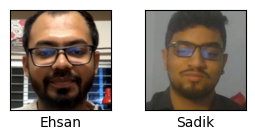

In [6]:
plt.figure(figsize=(15, 4))
i = 0
for c in categories:
    path = os.path.join(data_dir, c)
    try:
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            if img_array is not None:
                plt.subplot(3, 11, i + 1)
                plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
                plt.xlabel(c)
                plt.xticks([])
                plt.yticks([])
                i += 1
                break
    except Exception as e:
        print(f"Error processing category {c}: {e}")
plt.tight_layout()
plt.show()

In [8]:
train_data = []
test_data = []
valid_data = []

split_ratio = 0.8

for c in categories:  
    path = os.path.join(data_dir, c)
    imgs = os.listdir(path) 
    random.shuffle(imgs)

    total_sample_num = len(imgs)
    train_sample_num = int(total_sample_num * split_ratio * 0.8)
    valid_sample_num = int(total_sample_num * split_ratio * 0.2)

    train_imgs = imgs[ : train_sample_num]
    valid_imgs = imgs[train_sample_num : train_sample_num + valid_sample_num]
    test_imgs =  imgs[train_sample_num + valid_sample_num : ]

    for img in tqdm(train_imgs, desc=f"Train data: {c}"):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_array, (256, 256))  # resize the image
            train_data.append([img_resized, categories.index(c)]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass
    
    for img in tqdm(valid_imgs, desc=f"Valid data: {c}"):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_array, (256, 256))  # resize the image
            valid_data.append([img_resized, categories.index(c)]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass
    
    for img in tqdm(test_imgs, desc=f"Test data: {c}"):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_array, (256, 256))  # resize the image
            test_data.append([img_resized, categories.index(c)]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass



Test data: Sadik: 100%|██████████| 360/360 [00:03<00:00, 107.81it/s]


In [10]:
# Shuffle the data
IMG_SIZE=256

random.shuffle(train_data)
random.shuffle(valid_data)
random.shuffle(test_data)

# Extract features (X) and labels (Y)
X_train, y_train = zip(*train_data)
X_valid, y_valid = zip(*valid_data)
X_test, y_test = zip(*test_data)

# Convert to numpy arrays and reshape
X_train = np.array(X_train).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)
X_valid = np.array(X_valid).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_valid = np.array(y_valid)
X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)

# Print the number of samples in each set
print("Number of training samples:", len(train_data))
print("Number of validation samples:", len(valid_data))
print("Number of test samples:", len(test_data))

Number of training samples: 2304
Number of validation samples: 576
Number of test samples: 720


In [13]:
save_dir = './pickle'

pickle_out = open(os.path.join(save_dir, "categories.pickle"),"wb")
pickle.dump(categories, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(save_dir, "X_train.pickle"),"wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(save_dir, "y_train.pickle"),"wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(save_dir, "X_valid.pickle"),"wb")
pickle.dump(X_valid, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(save_dir, "y_valid.pickle"),"wb")
pickle.dump(y_valid, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(save_dir, "X_test.pickle"),"wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(save_dir, "y_test.pickle"),"wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()